# Churn Analysis
The objective of this case study is to use supervised learning-based models to predict a classification-based model to predict churn.

# Content

* [1. Introduction](#1)
* [2. Business Understanding](#2)
* [3. Data Understanding](#3)
    * [3.1 Load Libraries](#3.1)    
    * [3.2. Load Dataset](#3.2)
    * [3.3. Exploratory Data Analysis (EDA)](#3.3)
    * [3.4. Descriptive Statistics](#3.4)
    * [3.5. Data Visualization](#3.5)
* [4. Data Preparation](#4)
    * [4.1 Eliminate Unnecessary Columns](#4.1)
    * [4.2 Categorical Columns Analysis](#4.2)
        * [4.2.1 One Hot Encoder](#4.2.1)
        * [4.2.2 Chi-Square Test](#4.2.2)
    * [4.3 Numerical Columns Analysis](#4.3) 
        * [4.3.1 One Hot Encoder](#4.3.1)
        * [4.3.2 Chi-Square Test](#4.3.2)
* [5. Modeling](#5)
    * [5.1 Train / Test Split](#5.1) 
    * [5.2.Logistic Regression Model](#5.2)
        * [5.2.1 Model Evaluation](#5.2.1)
    * [5.3.Random Forest Model](#5.3)
        * [5.2.1 Model Evaluation](#5.3.1)
    * [5.4.Neural Network Model](#5.4)
        * [5.4.1 Model Evaluation](#5.4.1) 
* [6. Model Comparison](#6)
* [7. Bibliography](#7)

<a id='1'></a>
# 1. Introduction

This project focuses on enhancing the efficiency of the original analysis of Churn in a telecommunications company. We will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) model to structure our data analysis approach. This methodology will allow us to systematically process and analyze information, ensuring that the results are clear and coherent. The main objective is to provide stakeholders with a detailed and well-substantiated report on the findings, thereby facilitating data-driven decision-making.

<a id='2'></a>
# 2. Business Understanding

The primary goal of this project is to develop a robust predictive model to identify 'Churn', that is, to accurately predict those customers who are highly likely to leave the company. To achieve this, we will implement a supervised learning approach, specifically focused on classification tasks. This method will allow us to analyze patterns in the historical data of customers to predict their future behavior, significantly contributing to customer retention and the sustained success of the company.

<a id='3'></a>
# 3. Data Understanding

<a id='3.1'></a>
## 3.1 Load Libraries

In [1]:
from IPython.display import Image
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

<a id='3.2'></a>
## 3.2. Load Dataset

In [2]:
data = pd.read_csv("Telco_Churn.csv")

<a id='3.3'></a>
## 3.3. Exploratory Data Analysis (EDA)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


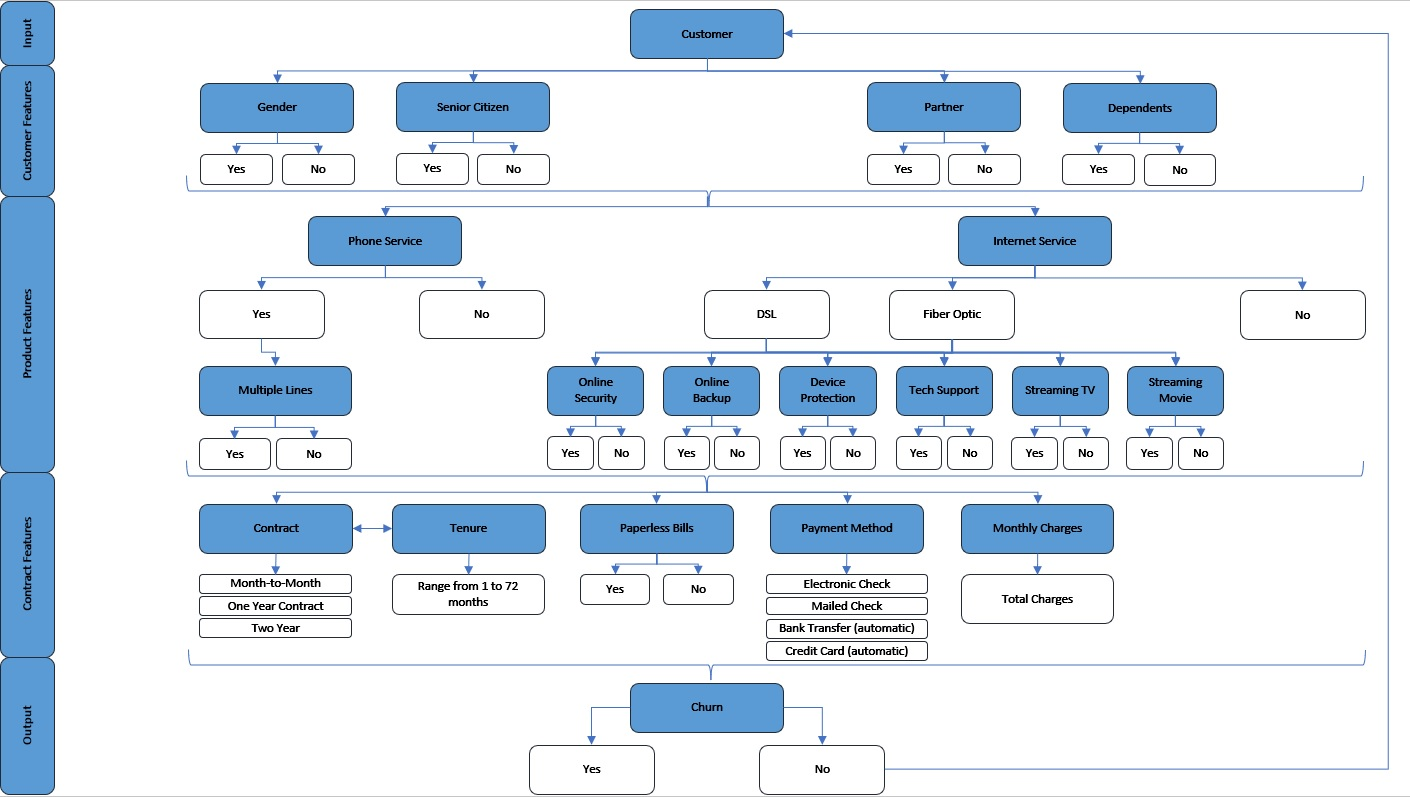

In [4]:
Image(filename =r'Diagram.jpg')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

<a id='3.4'></a>
## 3.4. Descriptive Statistics

We can obtain the descriptive statistics for our dataset with this function. The output of this function is a list of all the column statistics in the dataset. Identification of outliers or missing data benefits from a deep comprehension of the data being worked on. The subsequent table presents the data the categorical variables, highlighting unique values, frequency, and the most frequently occurring top of the class, and for the the numerical variables analize the mean, standard deviation, lowest and maximum values, and the percentiles of 25, 50, and 75% are shown in the summary that follows.

In [7]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


While our initial data inspection indicates no null values, its important to recognize that object-type columns in the DataFrame might contain hidden missing values, such as blank or empy strings, that Pandas doesn't automatically indentify. These overlooked values can skew analysis and model predictions. Therefore, a thorough examination of these columns is necessary to indentify and appropriately hanldle such ambiguities, ensuring the integrity and accuracy of our data analysis.

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As our main goal is to forecast "Churn" for a telecom company we will proceed to analyse the distribution of our variable target.

In this analysis, it is evident that our data presents a significant imbalance: 32.12% of the records correspond to customers who have discontinued the service (Churn), while the remaining 67.88% represents customers who continue to be active. This imbalance could introduce biases during our analysis, which is crucial to consider.

A common technique to address this kind of imbalance is the SMOTE method, which involves generating synthetic data to increase the representation of customers with Churn. However, this approach can introduce noise into our data, which is not advisable in many cases. Therefore, for this specific analysis, we have decided to work only with the existing data, accepting its current distribution and carefully considering the implications of this imbalance in our conclusions and recommendations.

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

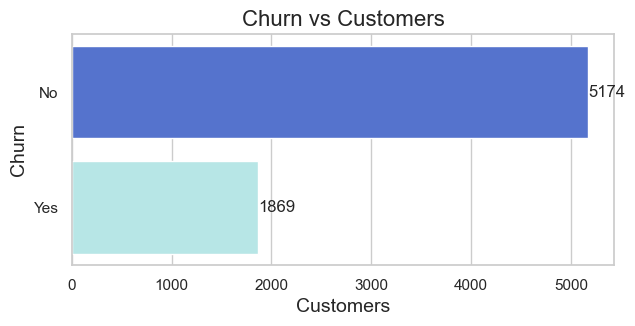

In [10]:
# Set a visual style
sns.set(style="whitegrid")

# Define a custom color palette
palette = sns.color_palette(["#4169E1", "#AFEEEE"])  # Blue for 'No', Light Blue for 'Yes'

# Create the figure and axis
plt.figure(figsize=(7, 3))

# Count the occurrences of each category
churn_counts = data['Churn'].value_counts()

# Create the horizontal bar chart
sns.barplot(x=churn_counts.values, y=churn_counts.index, palette=palette)

# Add titles and labels
plt.title('Churn vs Customers', fontsize=16)
plt.ylabel('Churn', fontsize=14)
plt.xlabel('Customers', fontsize=14)

# Add values on top of each bar
for index, value in enumerate(churn_counts.values):
    plt.text(value, index, str(value), va='center')

# Show the plot
plt.show()

<a id='3.5'></a>
## 3.5. Data Visualization

For the purpose of visualisation and analysis, keep in mind that the variable SeniorCitizen is categorical due to the nature of the data it contains, while the variable TotalCharges is considered numerical due to its characteristics. However, since the variable totalcharges will be treated as numerical, we will first do a more detailed analysis to determine how to proceed with it going forward.

- Numerical variables

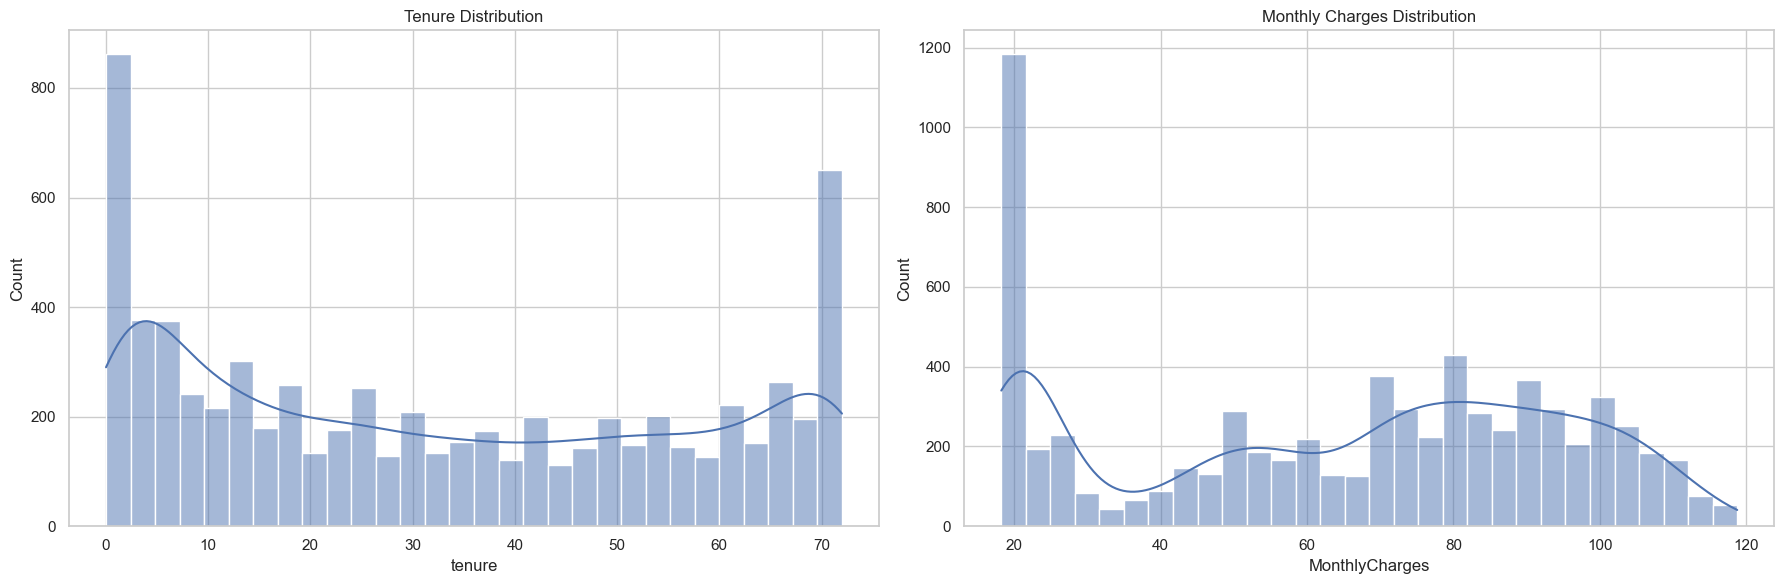

In [11]:
# Creating the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'tenure'
sns.histplot(data['tenure'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')

# Plot for 'MonthlyCharges'
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

plt.tight_layout()
plt.show()

In the upper graph of the variable tenure we observe significant peak values at the extremes of the distribution, which suggests a high concentration of new customers (lower tenure) and long-term customers (higher tenure). The presence of these spots may indicate a behaviour, where customers tend to discontinue services in the first few months or stay with them for an extended period of time.

In the second grph it appears that the distributions is bimodal, suggesting two distinct groups in terms of montly jobs. This coul represent several market segment, such a those who choose basic against premium plans. Additionally, a notable concentration of customers is seen at the lower end of the price scale which may indicate a preference for more economical plans.

- Categorical Variables

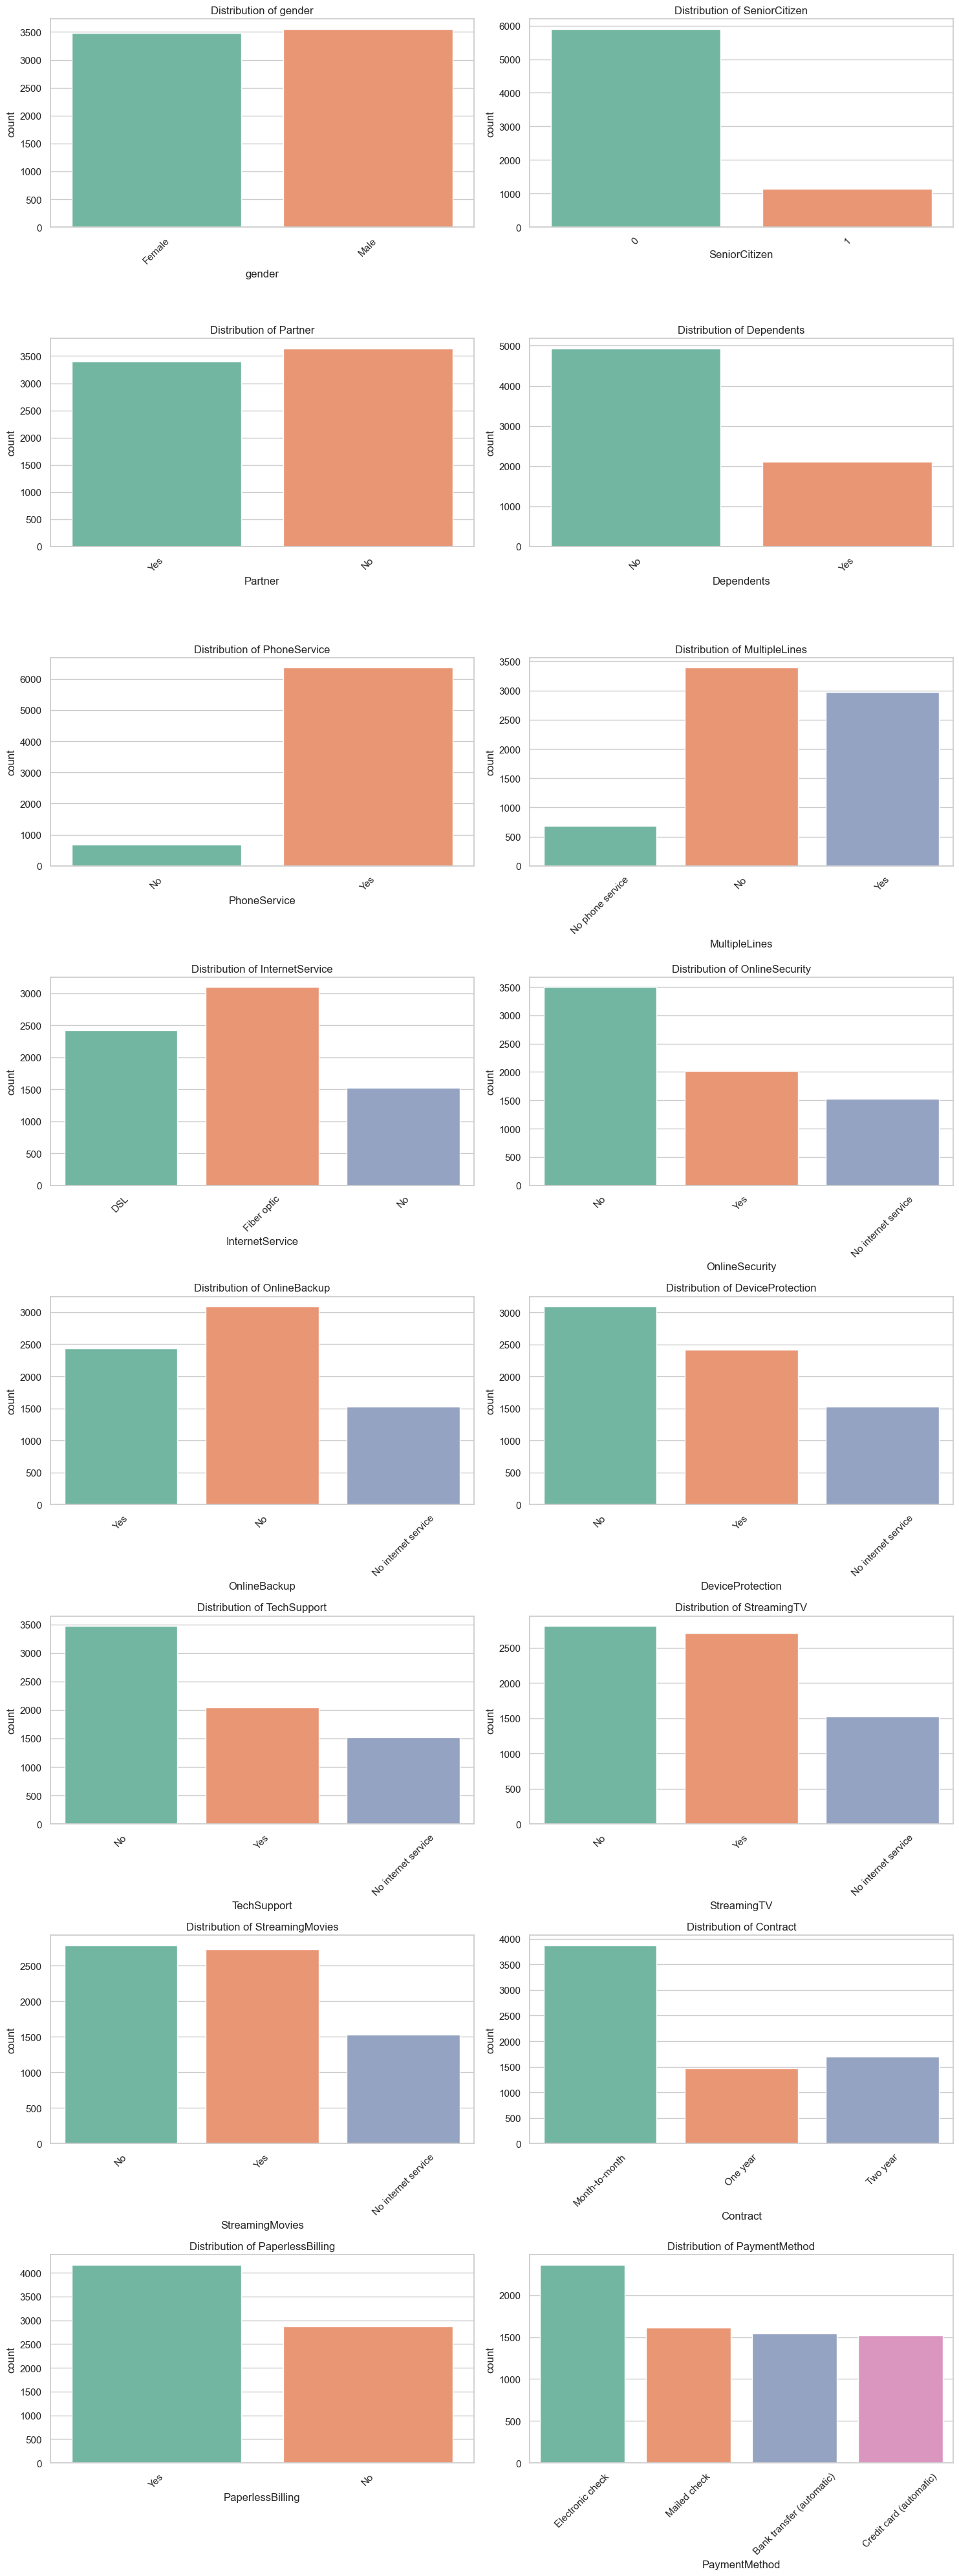

In [12]:
# Configuration for the plots
sns.set(style="whitegrid", palette="pastel")

# List of the new categorical variables
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

# Determining the number of rows needed for the subplots
n_rows = len(categorical_vars) // 2 + len(categorical_vars) % 2

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 5))

# Iterating through the variables and creating bar charts
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 2)
    sns.countplot(x=var, data=data, ax=axes[row, col], palette="Set2")
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjustment for when the number of variables is odd (hide last subplot if empty)
if len(categorical_vars) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

To advance our analysis, we will employ correlation techniques to assess the usefulness and impact of various factors. This will hep us to understand the direct relationships our target variable may have with other features. By doing so, we aim to uncover significant correlations thah could reveal insightful trends and patterns, guiding our predictive modeling and decision-making processes.

<a id='4'></a>
# 4. Data Preparation

<a id='4.1'></a>
## 4.1 Eliminate unnecessary columns for our analysis

In [13]:
# Delete the "customerID" Column
data.drop('customerID', axis=1, inplace=True)

<a id='4.2'></a>
## 4.2 Analysis of our Categorical Columns

In this step, we will analyze our categorical variables to observe the importance that each category has with our target variable (Churn).

In [14]:
# Categorical Columns
categorical_cols = ['gender', 'SeniorCitizen', 'Dependents', 'Partner', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

<a id='4.2.1'></a>
### 4.2.1 One Hot Encoder

In this stage, we will apply the One Hot Encoding method to convert each category within our categorical variables into a distinct binary feature, represented by 0 or 1. This approach is advantageous because the machine learning models we will use, such as Logistic Regression, perform better with numerical variables compared to categorical ones.

The main procedure of One Hot Encoding involves transforming each categorical variable into binary features. For example, consider the 'Gender' column, which contains two categories: 'Male' and 'Female'. One Hot Encoding will split this column into two new columns, 'gender_Female' and 'gender_Male', assigning each a binary value of 0 or 1, as appropriate.

However, a drawback of this method is the increase in data dimensionality. Although One Hot Encoding is not recommended for variables with a large number of categories, in our case, as we have a limited number of categories, its implementation is suitable and useful.

Below we can see a table with the new columns created by One Hot Encoder.

Reference: Chapter 6. Statistical Machine Learning - Practical Statistics for Data Scientists by Peter Bruce and Andrew Bruce Copyright © 2017 Peter Bruce and Andrew Bruce.

In [15]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   object 
 3   Churn                                    7043 non-null   object 
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  Partner_No                               7043 no

<a id='4.2.2'></a>
### 4.2.2 Chi-Square Test

The Chi-Square Test is a statistical method used to assess whether there is a significant relationship between two categorical variables. This analysis is particularly useful, for example, to investigate if there is a correlation between gender and the phenomenon of 'Churn' (customer turnover or attrition).

In our analysis, we will apply the Chi-Square Test to our categorical variables to determine if they have a significant relationship with our target variable, Churn.

The 'chi_scores' table reflects the relevance of each feature in our study. A higher score indicates a greater likelihood that the feature in question is significant in predicting the target variable, in this case, Churn.

To facilitate the interpretation of these values, we have created a graph that ranks the features from the most to the least important in relation to their impact on Churn. This graph helps to clearly and effectively visualize which variables are most influential in predicting Churn.

Reference: Chapter 3. Statistical Experiments and Significance Testing - Practical Statistics for Data Scientists by Peter Bruce and Andrew Bruce Copyright © 2017 Peter Bruce and Andrew Bruce.

In [17]:
# Non Categorical Columns
non_categorical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Categorical Columns
categorical_encoded_cols = [col for col in data.columns if col not in non_categorical_cols]

# Chi-Square Categorical Columns
X_categorical = data[categorical_encoded_cols]
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  

chi_scores = chi2(X_categorical, y)

print(chi_scores)

(array([2.63667886e-01, 2.58698618e-01, 2.60005870e+01, 1.34351545e+02,
       5.69038910e+01, 1.33036443e+02, 7.70024458e+01, 8.24120826e+01,
       9.07147852e-01, 9.72606249e-02, 3.87478204e+00, 9.07147852e-01,
       6.54851159e+00, 7.13131803e+01, 3.74476216e+02, 2.86520193e+02,
       4.16182917e+02, 2.86520193e+02, 1.47295858e+02, 2.84074903e+02,
       2.86520193e+02, 3.12176940e+01, 2.51672514e+02, 2.86520193e+02,
       2.02266622e+01, 4.06117093e+02, 2.86520193e+02, 1.35559783e+02,
       7.03495155e+01, 2.86520193e+02, 1.73342348e+01, 7.28987557e+01,
       2.86520193e+02, 1.62425307e+01, 5.19895311e+02, 1.76123171e+02,
       4.88578090e+02, 1.53480111e+02, 1.05680863e+02, 7.64859132e+01,
       9.95820574e+01, 4.26422767e+02, 4.56515896e+01]), array([6.07611392e-001, 6.11015635e-001, 3.41313557e-007, 4.57695863e-031,
       4.57639460e-014, 8.87672856e-031, 1.70746377e-018, 1.10476396e-019,
       3.40872312e-001, 7.55142091e-001, 4.90166739e-002, 3.40872312e-001,
       

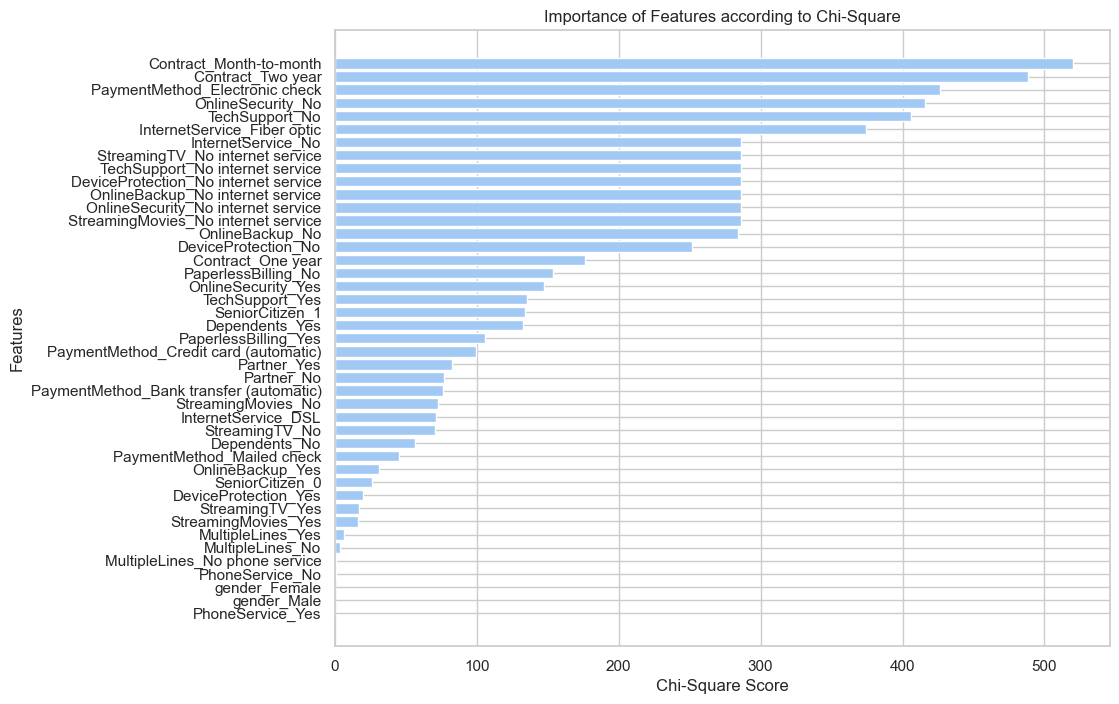

In [18]:
# DataFrame
chi_results = pd.DataFrame({
    'Features': categorical_encoded_cols,
    'Score': chi_scores[0]
})

chi_sorted = chi_results.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(chi_sorted['Features'], chi_sorted['Score'])
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Importance of Features according to Chi-Square')
plt.gca().invert_yaxis()
plt.show()

<a id='4.3'></a>
## 4.3 Analysis of our Numerical Columns

We can see that our 'TotalCharges' column contains 11 NaN values which will be replaced by the Median.

In [19]:
# Numeric Columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
# Null Values

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    data[col] = data[col].replace(' ', np.nan)

In [21]:
null_values = data[numeric_cols].isnull().sum()
print(null_values)

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64


In [22]:
# Median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<a id='4.3.1'></a>
### 4.3.1 Standard Scaler

The primary purpose of the Standard Scaler is a crucial data preprocessing technique, aimed at transforming the data so that they have a mean (average) of zero and a standard deviation of one. This standardization of features (variables) is essential to ensure that each contributes equally to the analysis or predictive models, regardless of their original scales. This uniformity is especially vital in models that are sensitive to the scale of variables, such as logistic regression. By applying the Standard Scaler, we enhance the accuracy and effectiveness of the model by eliminating any bias that may arise due to differences in the scales of the variables.


Reference: Chapter 3.Unsupervised Learning and Preprocessing - Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido Copyright © 2017 Sarah Guido, Andreas Müller

In [23]:
# StandardScaler Numercial Variables
scaler = StandardScaler()

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [24]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


<a id='4.3.2'></a>
### 4.3.2 ANOVA 

ANOVA is a key statistical technique for comparing the means of two or more groups. Its primary use is to determine if there are statistically significant differences between the means of three or more independent groups.

Functioning as a type of linear model, ANOVA is instrumental in analyzing how a continuous dependent variable relates to one or more categorical independent variables. In our specific case, we use ANOVA to investigate whether our numerical variables show statistically significant differences in relation to our target variable, Churn.

According to the results of the ANOVA analysis, all the selected numerical variables demonstrate a statistically significant relationship (p-value < 0.05) with Churn, indicating that they are key factors in predicting or explaining the Churn phenomenon.

For a more intuitive interpretation of these results, we have prepared a graph that ranks the numerical variables in descending order of importance, based on their impact on Churn. This graph is an effective visual tool for identifying which variables have the most influence on the prediction of Churn.

Reference: Chapter 3.Statistical Experiments and Significance Testing - Practical Statistics for Data Scientists by Peter Bruce and Andrew Bruce Copyright © 2017 Peter Bruce and Andrew Bruce. 

In [25]:
# ANOVA Numerical Variables
X_numeric = data[numeric_cols]  
y = data['Churn']

anova_scores = f_classif(X_numeric, y)

print(anova_scores)

(array([997.2680105 , 273.46370421, 290.43983088]), array([7.99905796e-205, 2.70664561e-060, 7.50860906e-064]))


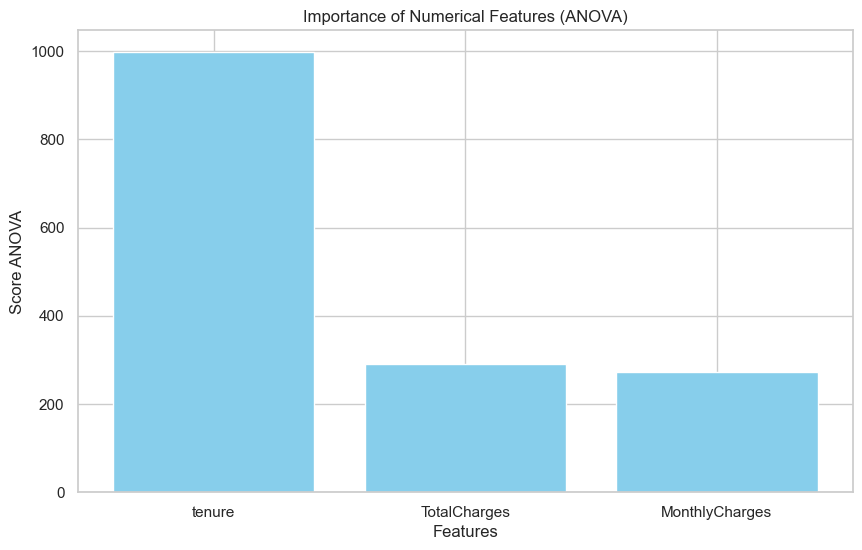

In [26]:
# Numeric Features
numeric_feature_names = ['tenure', 'MonthlyCharges', 'TotalCharges']

# DataFrame
anova_results = pd.DataFrame({
    'Features': numeric_feature_names,
    'Score': anova_scores[0]
})

anova_sorted = anova_results.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(anova_sorted['Features'], anova_sorted['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Score ANOVA')
plt.title('Importance of Numerical Features (ANOVA)')
plt.show()

<a id='5'></a>
# 5. Modeling


Reference: Chapter 2 -5. Supervised Learning - Model Evaluation and Improvement - Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido Copyright © 2017 Sarah Guido, Andreas Müller.

<a id='5.1'></a>
## 5.1 Train / Test Split (80-20)

In [27]:
# Split predictive variables and target variable
X = data.drop('Churn', axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Train / Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 46) (1409, 46) (5634,) (1409,)


In [28]:
y_train.value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

<a id='5.2'></a>
## 5.2 Logistic Regression Model with  Hyper-Tuning, GridSearchCV and Cross-Validation

In [29]:
# Logistic Regression Model
log_reg = LogisticRegression()

# Hyper-Tuning Parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the Model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

<a id='5.2.1'></a>
### 5.2.1 Model Evaluation

In [30]:
# Prediction Test
y_pred = grid_search.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

[[940 121]
 [143 205]]


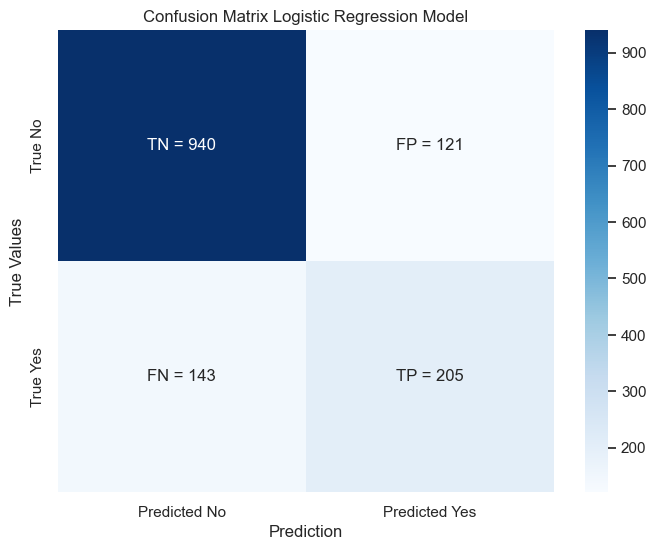

In [31]:
# DataFrame Confusion Matrix
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['True No', 'True Yes'], 
    columns=['Predicted No', 'Predicted Yes']
)

# Labels
labels = np.array([['TN = 940', 'FP = 121'], ['FN = 143', 'TP = 205']])

# Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=labels, fmt='', cmap='Blues', ax=ax)

plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Confusion Matrix Logistic Regression Model')
plt.show()

<a id='5.3'></a>
## 5.3 Random Forest Model with  Hyper-Tuning, GridSearchCV and Cross-Validation

In [32]:
# Random Forest Model
rf = RandomForestClassifier()

# Hyper-Tuning Parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the Model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

<a id='5.3.1'></a>
### 5.3.1 Model Evaluation

In [33]:
# Prediction Test
y_pred = grid_search.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.65      0.56      0.60       348

    accuracy                           0.82      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409

[[955 106]
 [153 195]]


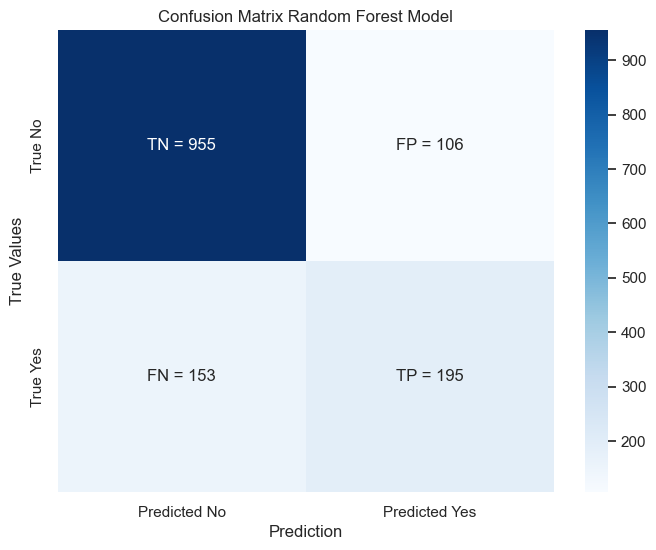

In [39]:
# DataFrame Confusion Matrix
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['True No', 'True Yes'], 
    columns=['Predicted No', 'Predicted Yes']
)

# Labels
labels = np.array([['TN = 955', 'FP = 106'], ['FN = 153', 'TP = 195']])

# Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=labels, fmt='', cmap='Blues', ax=ax)

plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Confusion Matrix Random Forest Model')
plt.show()

<a id='5.4'></a>
## 5.4 Neural Network Model with  Hyper-Tuning, GridSearchCV and Cross-Validation

In [35]:
# Neural Network Model
nn = MLPClassifier()

# Hyper-Tuning Parameters
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# GridSearchCV
grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=5, scoring='accuracy', verbose=1)

# Fit the Model
grid_search_nn.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=1)

<a id='5.4.1'></a>
### 5.4.1 Model Evaluation

In [36]:
# Prediction Test
y_pred_nn = grid_search_nn.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(conf_matrix_nn)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409

[[938 123]
 [150 198]]


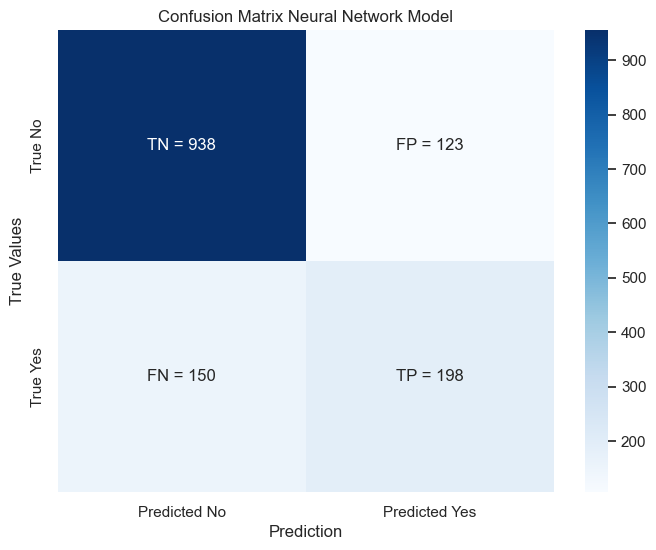

In [41]:
# DataFrame Confusion Matrix
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['True No', 'True Yes'], 
    columns=['Predicted No', 'Predicted Yes']
)

# Labels
labels = np.array([['TN = 938', 'FP = 123'], ['FN = 150', 'TP = 198']])

# Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=labels, fmt='', cmap='Blues', ax=ax)

plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Confusion Matrix Neural Network Model')
plt.show()

<a id='6'></a>
# 6. Model Comparison

In our analysis, our objective is to be able to predict Churn, which implies that the model must be better at predicting Churn = 1.

In this case, the three models have relatively similar performance in the classification of the No Churn class, but there are more significant differences in the classification of the Churn class. The Random Forest model appears to be slightly superior in terms of overall accuracy and has fewer false positives than Logistic Regression and Neural Networks.

In this case we use the Neural Network Model only for pedagogical purposes, since this model is capable of modeling extremely complex and non-linear relationships, which improve its performance as the size of the data set increases.
However, it is considered a "black box" model due to the difficulty in interpreting how it arrives at its predictions and requires specialized hardware such as GPUs for efficient training.

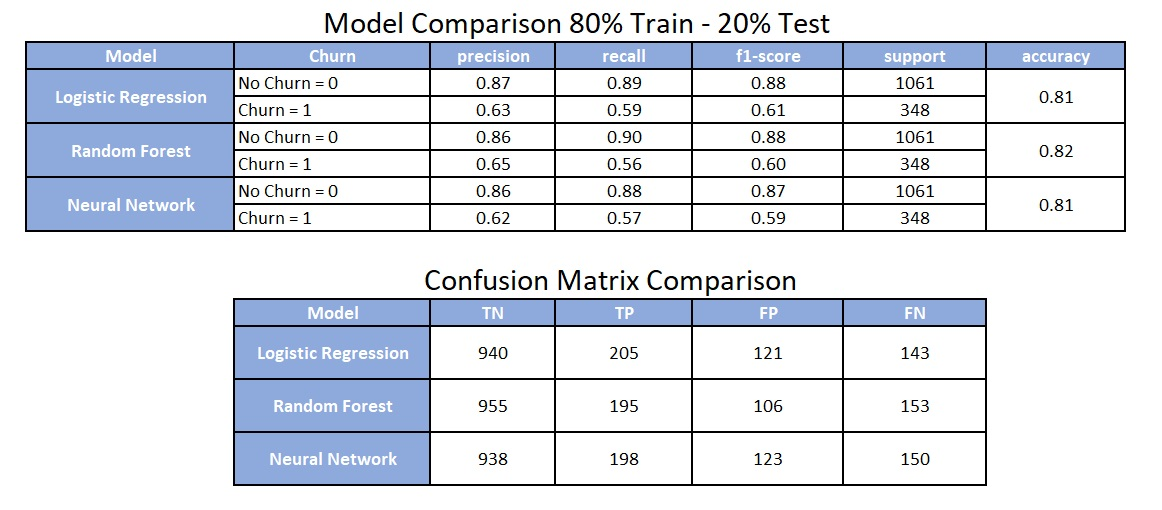

In [43]:
Image(filename =r'Model_Comparison.jpg')

<a id='7'></a>
# 7. Bibliography

* Practical Statistics for Data Scientists by Peter Bruce and Andrew Bruce Copyright © 2017 Peter Bruce and Andrew Bruce.

* Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido Copyright © 2017 Sarah Guido, Andreas Müller.

* Kaggle, Updated 5 Years Ago by Blastchar [online] Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

* GeeksforGeeks., 2021. Exploratory Data Analysis by KattamuriMeghna. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/